In [10]:
from lightkurve import search_targetpixelfile, search, search_lightcurvefile

import matplotlib.pyplot as plt
%matplotlib inline

from altaipony.flarelc import FlareLightCurve

import os
import copy

import numpy as np

from funcs.custom_detrending import custom_detrending, iteratively_remove_sines
from funcs.funcs import read_custom_aperture_lc

import astropy.units as u

CWD = "/".join(os.getcwd().split("/")[:-1])

c = 10#12
TIC = 44984200#277539431 

### Create a light curve mosaic from individual pixel light curves

In [ ]:
# if you need to create the tiles first, you have to do it manually
tpfl = search_targetpixelfile(f"TIC {TIC}", sector=c)
tpf = tpfl.download()
tpf.interact()

In [ ]:
paths = ! ls ../multiperiod_flares/277539431_12/single_pixel_LCs/


fig, ax = plt.subplots(nrows=5,ncols=5, figsize=(20,20), sharex=True)

for p in paths:
    i = 4-int(p[0])+1
    j = int(p[1])
    flc = search.open(f"{CWD}/weird_feature/{p}").get_lightcurve("FLUX")
    flc = FlareLightCurve(time=flc.time, flux=flc.flux, 
                      flux_err=flc.flux_err, cadenceno=flc.cadenceno, targetid=flc.targetid)

    #flcd = custom_detrending(flc)
    #ax[i][j].plot(flcd.time,flcd.detrended_flux/np.nanmedian(flcd.detrended_flux))
    ax[i][j].plot(flc.time,flc.flux/np.nanmedian(flc.flux))
    ax[i][j].set_xlim(1640,1644)
    #rel = np.nanmean(flcd.detrended_flux_err / flcd.detrended_flux)
    rel = np.nanmean(flc.flux_err / flc.flux)
    ax[i][j].set_ylim(.9-3*rel,1.2 + 8*rel)
    
plt.subplots_adjust(hspace=0.,wspace=0)
#plt.savefig(f"{CWD}/plots/weird_feature_nodet_relerrasymmetric.png",dpi=300)

/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/131ca_tess2019091210055-s0010-0000000044984200-0000-s_lc.fits' mode='rb' closefd=True>
  


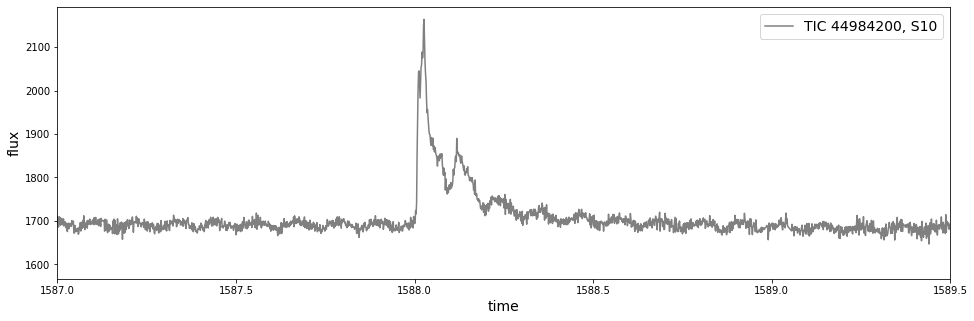

In [8]:
if TIC == 44984200:
    p = "131ca_tess2019091210055-s0010-0000000044984200-0000-s_lc.fits"
    dt = (1587,1589.5)
elif TIC == 277539431:
    p = "170ca_tess2019102314425-s0012-0000000277539431-0000-s_lc.fits"
    dt = (1641,1643.5)

flc = read_custom_aperture_lc(f"{CWD}/custom_aperture/{p}")

plt.figure(figsize=(16,5))

plt.plot(flc.time, flc.flux, c="grey",label=f"TIC {TIC}, S{c}")
#flcd = iteratively_remove_sines(flc)

#plt.plot(flcd.time, flcd.detrended_flux)

plt.xlim(*dt)
plt.xlabel("time",fontsize=14)
plt.ylabel("flux",fontsize=14)
plt.legend(fontsize=14)
plt.savefig(f"{CWD}/multiperiod_flares/{TIC}_{c}/plots/{TIC}_s{c}_lightcurve.png",dpi=300)

Found peak in periodogram at  8.83810300366823 1 / d
SNR at  4.843561726148278
Found peak in periodogram at  0.5 1 / d
SNR at  2.3907309132823014
Window lengths:  [2547, 369]
Do last SavGol round.


(1587, 1589.5)

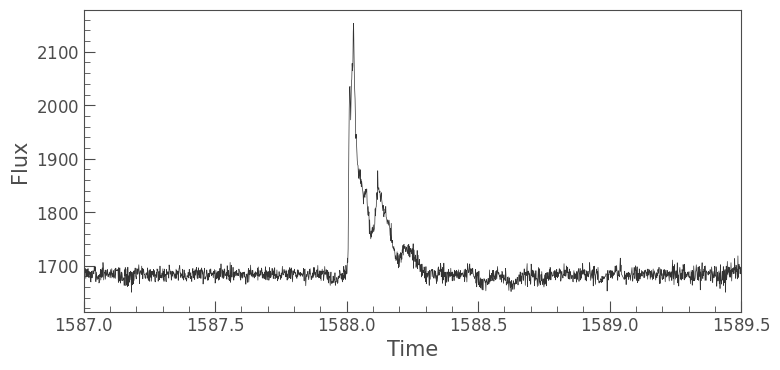

In [11]:
flcc = copy.deepcopy(flc)
flcc = custom_detrending(flcc)
flcc.flux[:] = flcc.detrended_flux
flcc.plot()

plt.xlim(*dt)

modulation period:  2.712461696095165 h


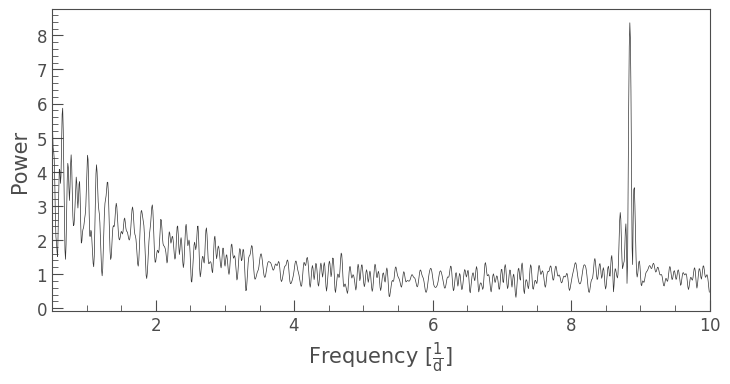

In [12]:
pg = flc.remove_nans().to_periodogram(freq_unit=1/u.d,
                                          maximum_frequency=10,
                                          minimum_frequency=0.5)
pg.plot()
plt.xlim(.5, 10)

plt.savefig(f"{CWD}/multiperiod_flares/{TIC}_{c}/plots/{TIC}_s{c}_periodogram.png",dpi=300)
print("modulation period: ", (1 / pg.frequency_at_max_power).to("h"))